In [16]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from PIL import Image

In [17]:
# function to return pixel value which stably occured most times
def get_stable(a):
    b = a[0:2]
    # print(b)
    j = 0
    # print(j)
    c = [a[0]]
    # print(c)
    for i in range(2, len(a)-1):
        # print(i)
        if a[i] == a[i+1]:
            b = np.append(b, a[i])
            # print(b)
        
    for i in range(1, len(b)-1):
        # print(i)
        # print(b[i])
        # print(c[j])
        if b[i] != c[j]:
            c = np.append(c, b[i])
            j += 1
    return statistics.mode(c)

In [30]:
# function to return pixel value which occured most times
def get_stable2(a):
    b = [a[0]]
    # print(b)
    j = 0
    # print(j)
    for i in range(1, len(a)-1):
        # print(i)
        if a[i] != a[i+1]:
            b.append(a[i])
            # print(b)
        
    return statistics.mode(b)

In [32]:
# read video from file
cap = cv2.VideoCapture('backg2_Trim.mp4')
df = []
while True:
    ret, frame = cap.read()
    if not ret: break # break if no next frame
    
    cv2.imshow('kk', frame) # show frame
    # print(frame)
    df.append(frame)
    if cv2.waitKey(1) & 0xFF == 27: # on press of Ecs break
        break
        
# release and destroy windows
cap.release()
cv2.destroyAllWindows()

In [33]:
arr = np.array(df)
print(arr.shape)

(209, 632, 860, 3)


In [45]:
still = arr[0,:,:,:] # one frame
still.shape

(632, 860, 3)

In [46]:
still.shape[0] # frame width

632

In [47]:
# direct application of mode function as filter
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = statistics.mode(arr[:,x,y,z])

In [36]:
# using custom bould filter "get_stable"
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = get_stable(arr[:,x,y,z])

#still.shape

In [42]:
# # using custom bould filter "get_stable2"
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = get_stable2(arr[:,x,y,z])

In [43]:
still.shape # processed Image array

(632, 860, 3)

In [48]:
# save as image and show
img = cv2.cvtColor(still, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img, 'RGB')
img.save('my223.png')
img.show()

In [18]:
# Use opencv to merge as b,g,r

img = cv2.merge((still[0], still[1], still[2]))  
cv2.imwrite('out.png', img)
cv2.imshow('a', img)

True

In [103]:
l = arr[:,0,0,0] # one pixel over time from all the frames

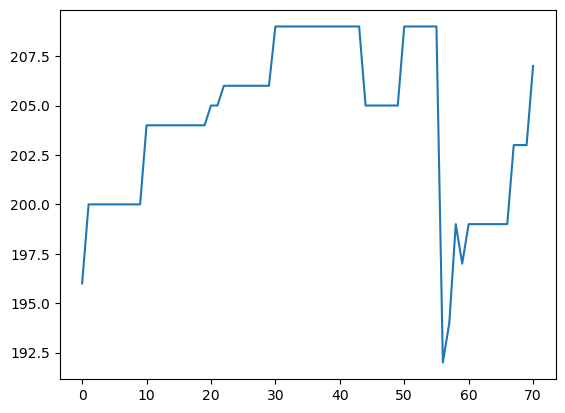

In [105]:
plt.plot(l) 

In [130]:
l2 = get_stable(l)

In [131]:
l2

205

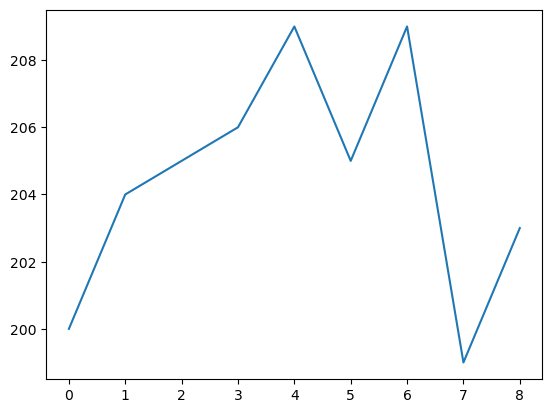

In [121]:
plt.plot(l2)

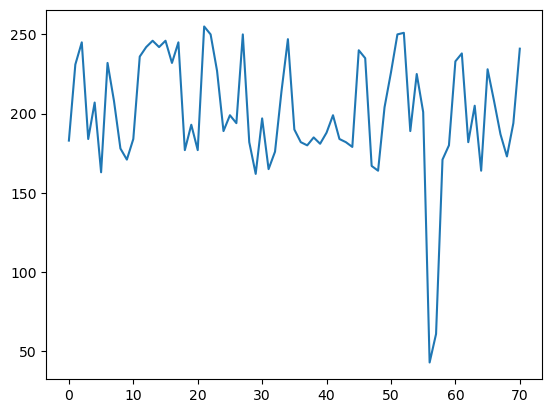

In [147]:
plt.plot(arr[:,192, 482, 2])


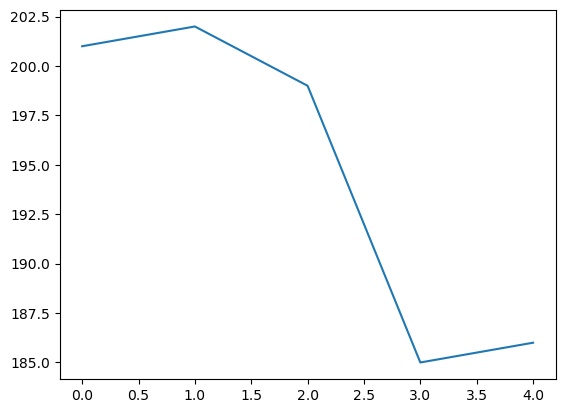

In [136]:
l3, l33 = get_stable(arr[:,200,400,0])
plt.plot(l33)

In [109]:
unique, counts = np.unique(l, return_counts=True)
dict(zip(unique, counts))

{192: 1,
 194: 1,
 196: 1,
 197: 1,
 199: 8,
 200: 9,
 203: 3,
 204: 10,
 205: 8,
 206: 8,
 207: 1,
 209: 20}